<a href="https://colab.research.google.com/github/Ninja-draw-coder/PythonProjects/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Heart Disease Prediction**

Objective
1. Provide the best performing model to determine probability for a patient having a heart disease or attack.

2. Providing the most important drivers for a heart disease or attack.

# **Phase 1: Data Understanding & Preprocessing**
Step 1. Import Libraries and Load Dataset

In [4]:
import pandas
import numpy
import matplotlib
import seaborn
import sklearn

#Load data set
df = pandas.read_csv('heartdisease.csv')
print(df.head())



   HeartDiseaseorAttack  HighBP  HighChol   BMI  Smoker  Diabetes  \
0                   0.0     1.0       1.0  40.0     1.0       0.0   
1                   0.0     0.0       0.0  25.0     1.0       0.0   
2                   0.0     1.0       1.0  28.0     0.0       0.0   
3                   0.0     1.0       0.0  27.0     0.0       0.0   
4                   0.0     1.0       1.0  24.0     0.0       0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  MentHlth  PhysHlth  Sex  \
0           0.0     0.0      1.0                0.0      18.0      15.0  0.0   
1           1.0     0.0      0.0                0.0       0.0       0.0  0.0   
2           0.0     1.0      0.0                0.0      30.0      30.0  0.0   
3           1.0     1.0      1.0                0.0       0.0       0.0  0.0   
4           1.0     1.0      1.0                0.0       3.0       0.0  0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.

Step 2.1 Data Understanding & Preprocessing


In [5]:
print(df.head())
print(df.info())
print(df.describe())

   HeartDiseaseorAttack  HighBP  HighChol   BMI  Smoker  Diabetes  \
0                   0.0     1.0       1.0  40.0     1.0       0.0   
1                   0.0     0.0       0.0  25.0     1.0       0.0   
2                   0.0     1.0       1.0  28.0     0.0       0.0   
3                   0.0     1.0       0.0  27.0     0.0       0.0   
4                   0.0     1.0       1.0  24.0     0.0       0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  MentHlth  PhysHlth  Sex  \
0           0.0     0.0      1.0                0.0      18.0      15.0  0.0   
1           1.0     0.0      0.0                0.0       0.0       0.0  0.0   
2           0.0     1.0      0.0                0.0      30.0      30.0  0.0   
3           1.0     1.0      1.0                0.0       0.0       0.0  0.0   
4           1.0     1.0      1.0                0.0       3.0       0.0  0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.

Step 2.2: Handle Missing Values

Action: Identify and address missing values if any.

Step 2.3: Correcting Data Types (if necessary)

Action: Ensure all columns have the appropriate data type. For instance, binary flags (HighBP, HighChol, etc.) should ideally be treated as categorical (or boolean for some operations) even if they're loaded as integers. Age, Education, and Income are binned categories and should be treated as such.

In [7]:
print(df.isnull().sum())
print(df.dtypes)

# Convert binary flags to category type
binary_cols = ['HighBP', 'HighChol', 'Smoker', 'Diabetes', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'HeartDiseaseorAttack']
for col in binary_cols:
    df[col] = df[col].astype('category')

# Convert binned numeric to category type
binned_cols = ['Age', 'Education', 'Income', 'Sex']
for col in binned_cols:
    df[col] = df[col].astype('category')

# Convert binary flags to category type and map 0/1 to descriptive labels
binary_cols_to_map = {
    'HeartDiseaseorAttack': {0: 'No Heart Disease', 1: 'Heart Disease'},
    'HighBP': {0: 'No High BP', 1: 'High BP'},
    'HighChol': {0: 'No High Chol', 1: 'High Chol'},
    'Smoker': {0: 'Non-Smoker', 1: 'Smoker'},
    'Diabetes': {0: 'No Diabetes', 1: 'Diabetes'},
    'Fruits': {0: 'No Fruits', 1: 'Eats Fruits'},
    'Veggies': {0: 'No Veggies', 1: 'Eats Veggies'},
    'HvyAlcoholConsump': {0: 'No Heavy Alcohol', 1: 'Heavy Alcohol'},
    'Sex': {0: 'Female', 1: 'Male'} # Assuming 0 for Female, 1 for Male based on common conventions
}
for col, mapping in binary_cols_to_map.items():
    df[col] = df[col].astype('category').map(mapping)

# Convert other binned numeric columns to category type (Age, Education, Income)
binned_cols = ['Age', 'Education', 'Income']
for col in binned_cols:
    df[col] = df[col].astype('category')

HeartDiseaseorAttack        0
HighBP                      0
HighChol                    0
BMI                         0
Smoker                      0
Diabetes                35346
PhysActivity                0
Fruits                      0
Veggies                     0
HvyAlcoholConsump           0
MentHlth                    0
PhysHlth                    0
Sex                         0
Age                         0
Education                   0
Income                      0
dtype: int64
HeartDiseaseorAttack    category
HighBP                  category
HighChol                category
BMI                      float64
Smoker                  category
Diabetes                  object
PhysActivity             float64
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
MentHlth                 float64
PhysHlth                 float64
Sex                     category
Age                     category
Education               category
Income      

# **Phase 2: Exploratory Data Analysis (EDA)**
Step 1: Univariate Analysis
1.1 Analysis of Numerical features BMI,Mental health , Physical health

Action: Understand the distribution of individual features.



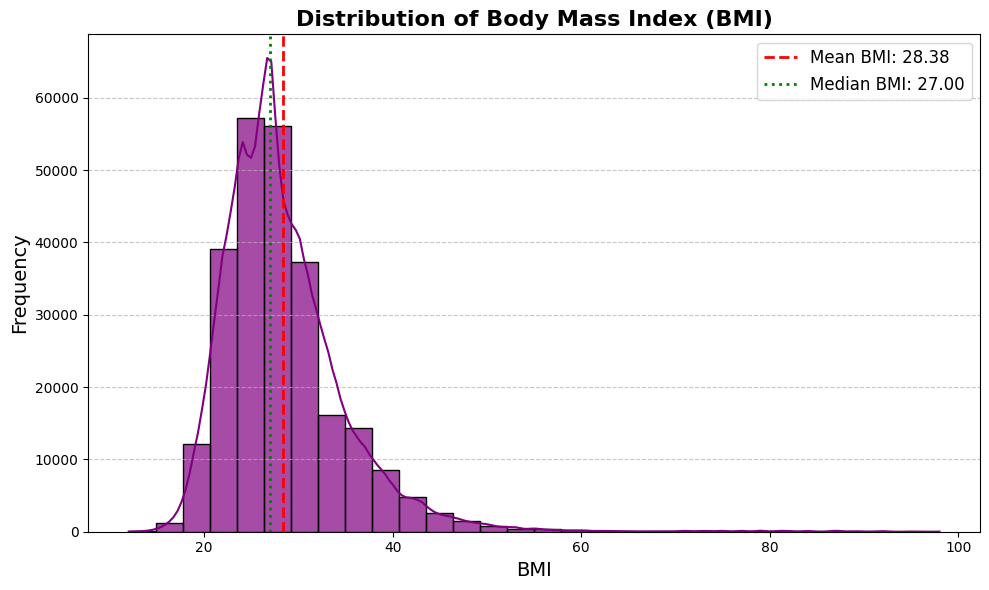

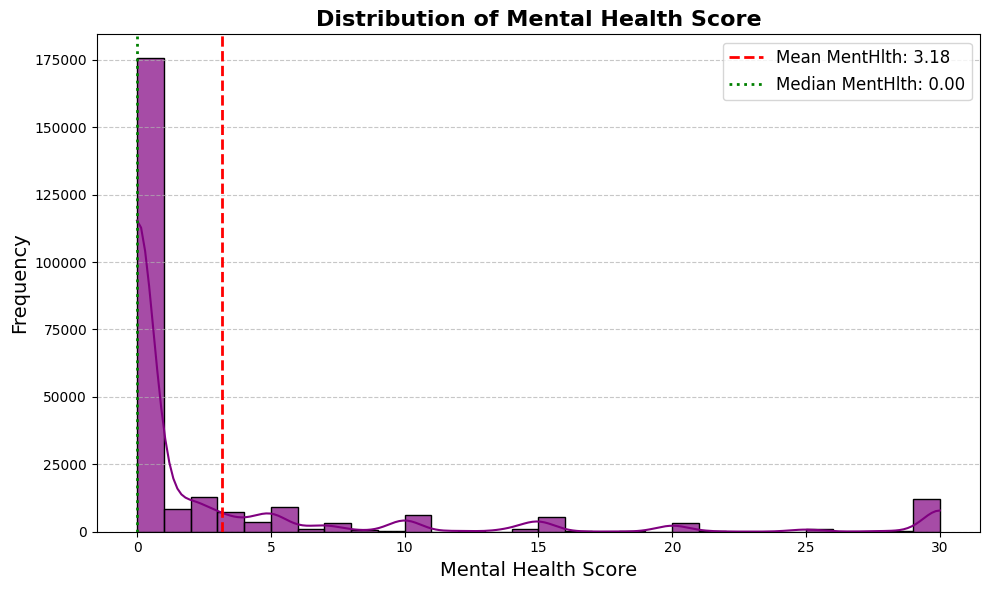

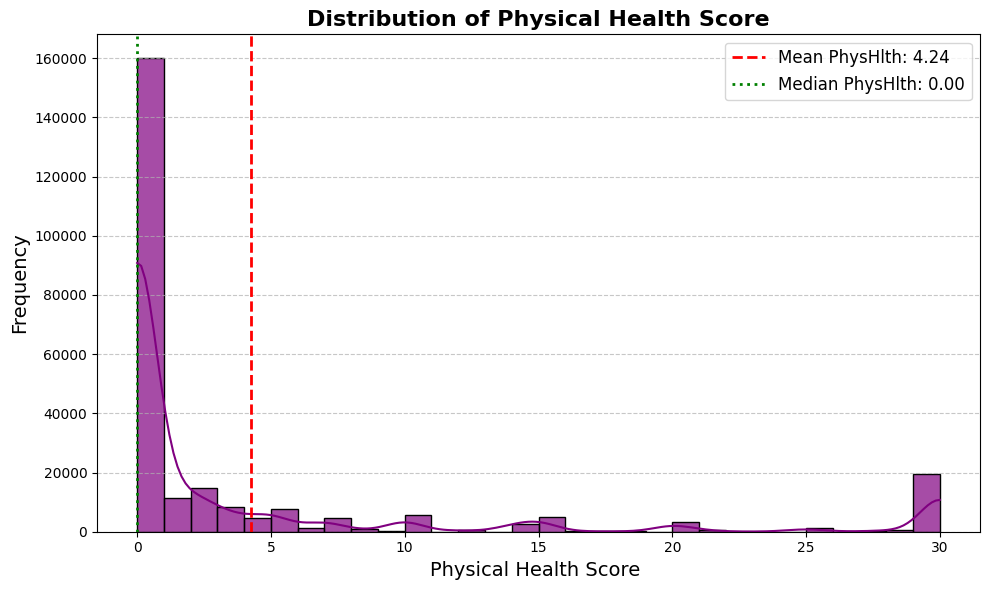

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features
numerical_cols = ['BMI', 'MentHlth', 'PhysHlth']

# Histogram for BMI
# Calculate mean and median BMI
mean_bmi = df['BMI'].mean()
median_bmi = df['BMI'].median()

plt.figure(figsize=(10, 6))

# Create the histogram with KDE
sns.histplot(df['BMI'], bins=30, kde=True, color='purple', edgecolor='black', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_bmi, color='red', linestyle='--', linewidth=2, label=f'Mean BMI: {mean_bmi:.2f}')
plt.axvline(median_bmi, color='green', linestyle=':', linewidth=2, label=f'Median BMI: {median_bmi:.2f}')

# Customize title and labels
plt.title('Distribution of Body Mass Index (BMI)', fontsize=16, fontweight='bold')
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a legend
plt.legend(fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# show the plot
plt.show()

# KDE plot for MentHlth
# Calculate mean and median for MentHlth
mean_menthlth = df['MentHlth'].mean()
median_menthlth = df['MentHlth'].median()

plt.figure(figsize=(10, 6))

# Create the histogram with KDE for MentHlth
sns.histplot(df['MentHlth'], bins=30, kde=True, color='purple', edgecolor='black', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_menthlth, color='red', linestyle='--', linewidth=2, label=f'Mean MentHlth: {mean_menthlth:.2f}')
plt.axvline(median_menthlth, color='green', linestyle=':', linewidth=2, label=f'Median MentHlth: {median_menthlth:.2f}')

# Customize title and labels
plt.title('Distribution of Mental Health Score', fontsize=16, fontweight='bold')
plt.xlabel('Mental Health Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a legend
plt.legend(fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()
plt.show()

# KDE plot for PhysHlth
# Calculate mean and median for MentHlth
mean_menthlth = df['PhysHlth'].mean()
median_menthlth = df['PhysHlth'].median()

plt.figure(figsize=(10, 6))

# Create the histogram with KDE for MentHlth
sns.histplot(df['PhysHlth'], bins=30, kde=True, color='purple', edgecolor='black', alpha=0.7)

# Add vertical lines for mean and median
plt.axvline(mean_menthlth, color='red', linestyle='--', linewidth=2, label=f'Mean PhysHlth: {mean_menthlth:.2f}')
plt.axvline(median_menthlth, color='green', linestyle=':', linewidth=2, label=f'Median PhysHlth: {median_menthlth:.2f}')

# Customize title and labels
plt.title('Distribution of Physical Health Score', fontsize=16, fontweight='bold')
plt.xlabel('Physical Health Score ', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a legend
plt.legend(fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

Univariate Analysis
1.2 Analysis of Categorical Binned Variables (Age, Education, Income)
Bar plots showing counts per bin.

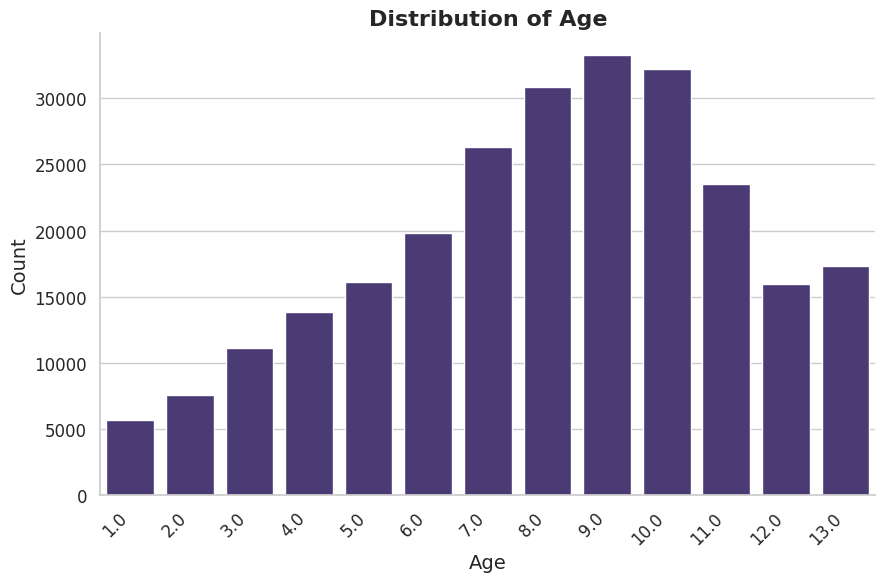

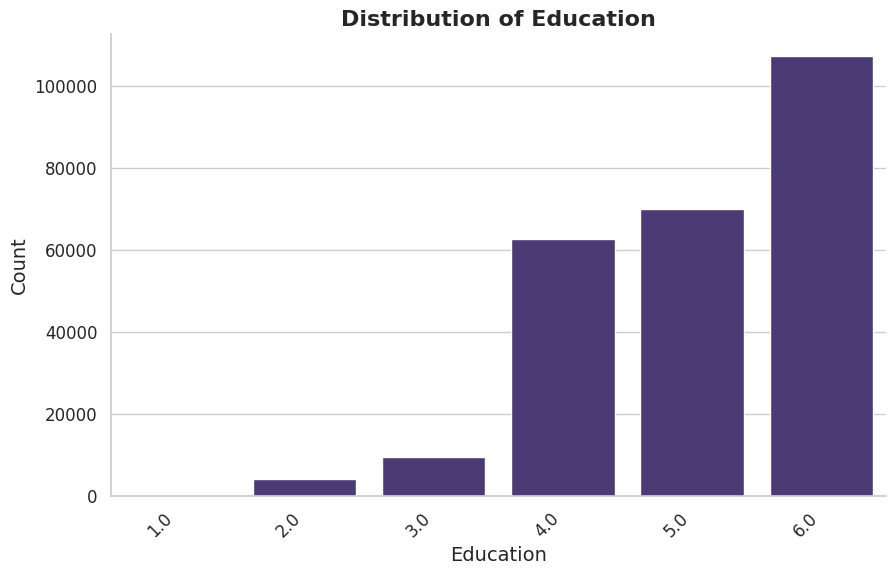

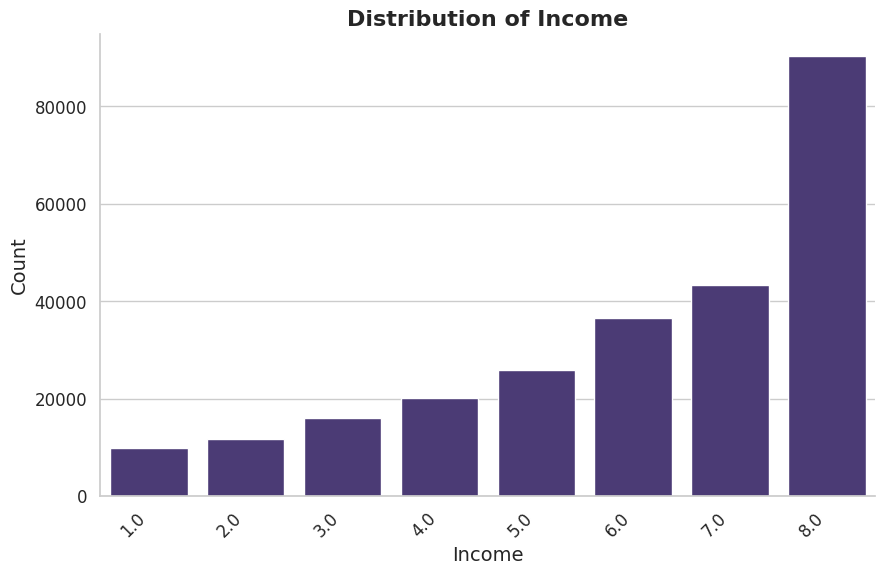

In [9]:
binned_cols = ['Age', 'Education', 'Income']
for col in binned_cols:
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")  # Or style="darkgrid", "white", "ticks"
    sns.set_palette('viridis')  # Or 'coolwarm', 'cubehelix', 'deep', etc.

    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col,fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right',fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine()  # Removes top and right spines for cleaner look
    plt.show()




In [14]:
# Convert binary flags to category type and map 0/1 to descriptive labels
binary_cols_to_map = {
    'HeartDiseaseorAttack': {0: 'No Heart Disease', 1: 'Heart Disease'},
    'HighBP': {0: 'No High BP', 1: 'High BP'},
    'HighChol': {0: 'No High Chol', 1: 'High Chol'},
    'Smoker': {0: 'Non-Smoker', 1: 'Smoker'},
    'Diabetes': {0: 'No Diabetes', 1: 'Diabetes'},
    'Fruits': {0: 'No Fruits', 1: 'Eats Fruits'},
    'Veggies': {0: 'No Veggies', 1: 'Eats Veggies'},
    'HvyAlcoholConsump': {0: 'No Heavy Alcohol', 1: 'Heavy Alcohol'},
    'Sex': {0: 'Female', 1: 'Male'} # Assuming 0 for Female, 1 for Male based on common conventions
}

for col, mapping in binary_cols_to_map.items():
    df[col] = df[col].astype('category').map(mapping)


# Select all categorical columns excluding the target variable for plotting
# Ensure 'HeartDiseaseorAttack' is dropped as it's the hue
categorical_features_for_plotting = df.select_dtypes(include='category').columns.drop('HeartDiseaseorAttack')

# Define a color palette
palette_choice = 'viridis' # Other good options: 'plasma', 'magma', 'cividis'

# Plotting stacked bar charts for each categorical feature against the target
for col in categorical_features_for_plotting:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='HeartDiseaseorAttack', palette=palette_choice)
    plt.title(f'Distribution of Heart Disease by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Heart Disease Status', title_fontsize='11', fontsize='10', loc='upper right')
    plt.tight_layout()
    plt.savefig(f'{col}_HeartDisease_Stacked_Chart_Labeled.png')
    plt.close()

/tmp/ipython-input-14-477475125.py:29: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(data=df, x=col, hue='HeartDiseaseorAttack', palette=palette_choice)
/tmp/ipython-input-14-477475125.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Heart Disease Status', title_fontsize='11', fontsize='10', loc='upper right')
/tmp/ipython-input-14-477475125.py:29: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(data=df, x=col, hue='HeartDiseaseorAttack', palette=palette_choice)
/tmp/ipython-input-14-477475125.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Heart Disease Status', title_fontsize='11', fontsize='10', loc='

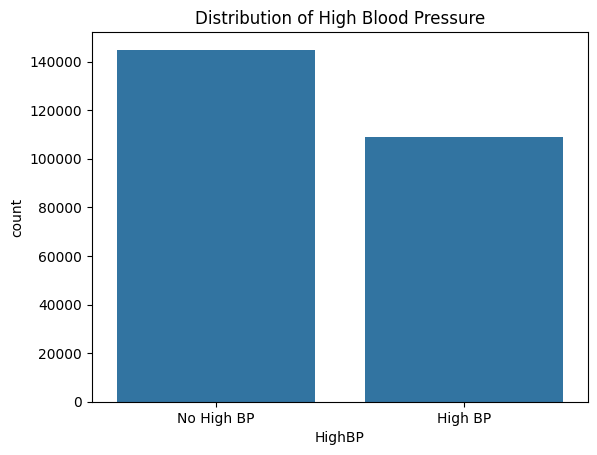

In [ ]:
# Example for HighBP
sns.countplot(x='HighBP', data=df)
plt.title('Distribution of High Blood Pressure')
plt.show()